In [1]:
import random
from sklearn.cluster import KMeans
import numpy as np
from numpy.random import randint
import matplotlib.pyplot as plt
import pandas as pd

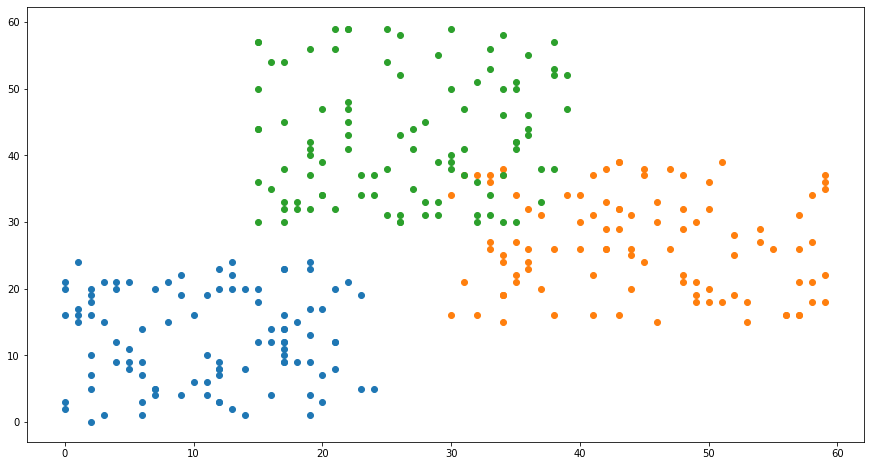

In [2]:
N = 100
x1 = randint(0, 25, N)
x3 = randint(15, 40, N)
x2 = randint(30, 60, N)

y1 = randint(0, 25, N)
y2 = randint(15, 40, N)
y3 = randint(30, 60, N)
x = np.append(np.append(x1, x2), x3)
y = np.append(np.append(y1, y2), y3)
df = pd.DataFrame()
df['x'] = x
df['y'] = y

plt.figure(figsize=(15,8))
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)

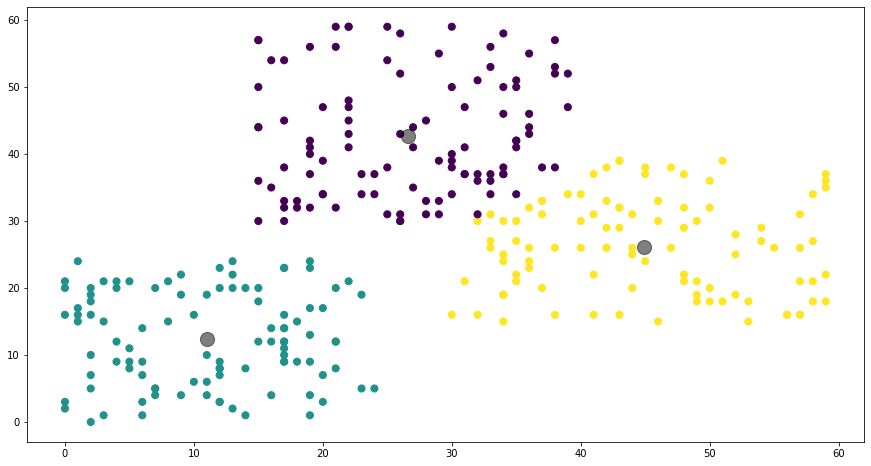

In [3]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)
plt.figure(figsize=(15,8))
plt.scatter(x,y, c=y_kmeans, s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
df['x'] = x
df['y'] = y
df['label'] = np.append(np.append([1 for i in range(0,N)], [2 for i in range(0,N)]), [3 for i in range(0,N)])

In [6]:
X = df.drop(columns=['label'])
Y = df.label

In [7]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X,Y)
knn.predict(X)[0:5]
knn.score(X, Y)

0.9766666666666667

In [8]:
ex = np.array([25,28]).reshape(1,-1)
knn.predict(ex)[0]

3

In [9]:
def plot_KNN(n_neigh, x_point, y_point):
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X,Y)
    knn.predict(X)[0:5]
    knn.score(X, Y)
    ex = np.array([x_point,y_point]).reshape(1,-1)

    plt.figure(figsize=(15,8))
    if knn.predict(ex)[0] == 1:
        color_pred = 'green'
    if knn.predict(ex)[0] == 2:
        color_pred = 'blue'
    if knn.predict(ex)[0] == 3:
        color_pred = 'orange'

    plt.scatter(ex[0][0], ex[0][1], c=color_pred, s=400, alpha=0.5);
    plt.scatter(x1,y1, c="green")
    plt.scatter(x2,y2, c='blue')
    plt.scatter(x3,y3, c='orange')

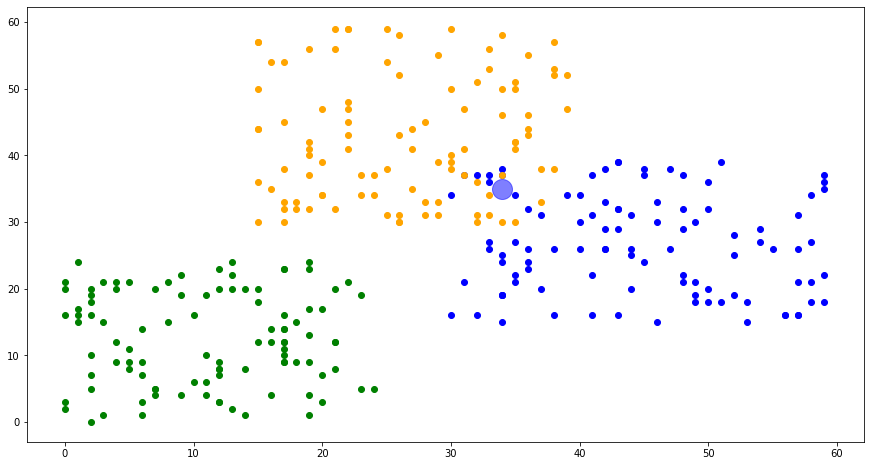

In [10]:
plot_KNN(2, 34,35)

In [11]:
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import sklearn

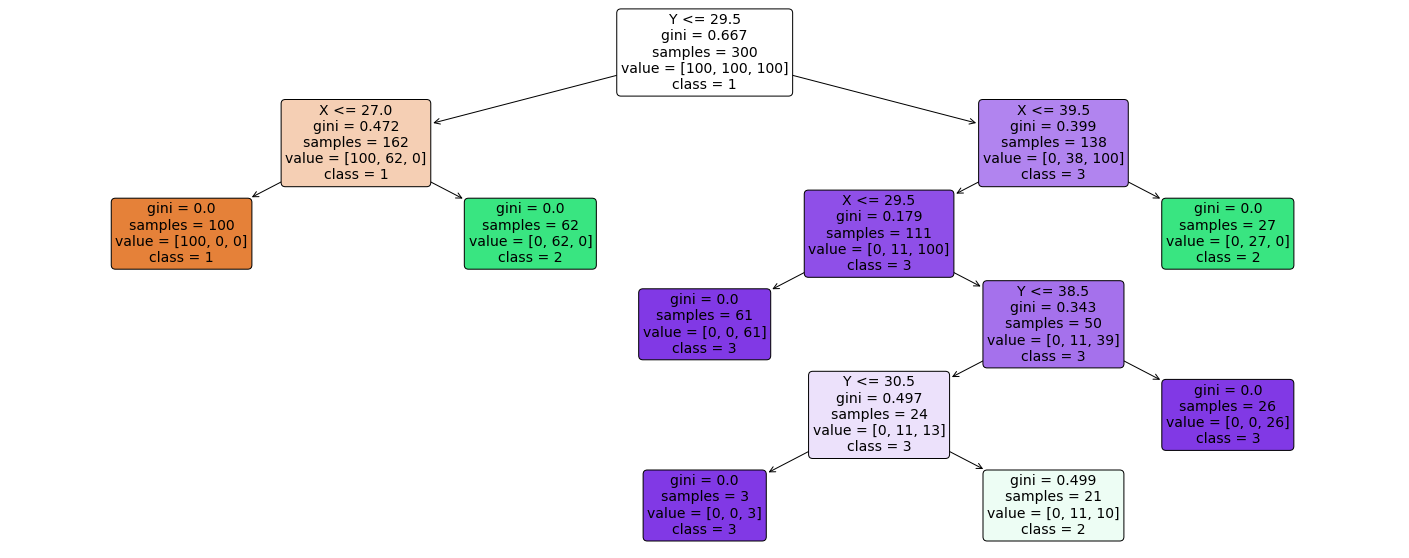

In [12]:
clf = DecisionTreeClassifier(max_depth=5) #max_depth is maximum number of levels in the tree
clf.fit(X, Y)

plt.figure(figsize=(25,10))
a = plot_tree(clf, 
              feature_names=["X", "Y"], 
              class_names=["1", "2", "3"], 
              filled=True, 
              rounded=True, 
              fontsize=14)

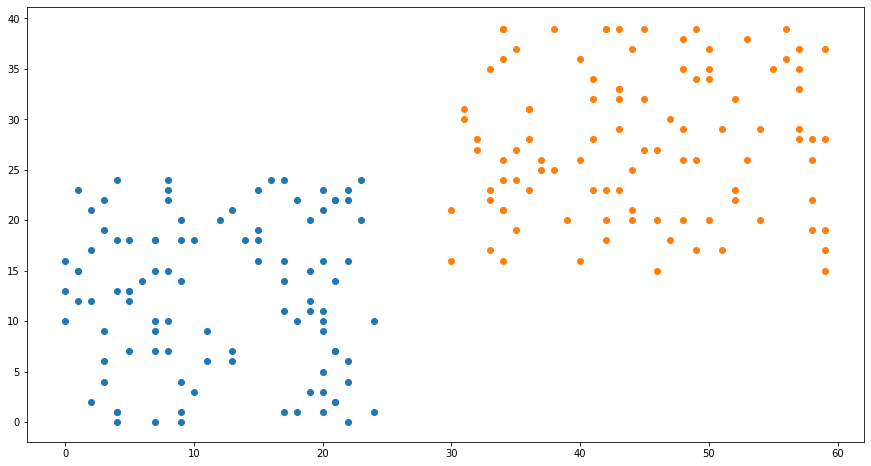

In [33]:
N = 100
x1 = randint(0, 25, N)
x3 = randint(15, 40, N)
y1 = randint(0, 25, N)
y2 = randint(15, 40, N)
x = np.append(x1, x2)
y = np.append(y1, y2)
df = pd.DataFrame()
df['x'] = x
df['y'] = y

plt.figure(figsize=(15,8))
plt.scatter(x1,y1)
plt.scatter(x2,y2)

df['x'] = x
df['y'] = y
df['label'] = np.append([1 for i in range(0,N)], [2 for i in range(0,N)])
X = df.drop(columns=['label'])
Y = df.label

In [34]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

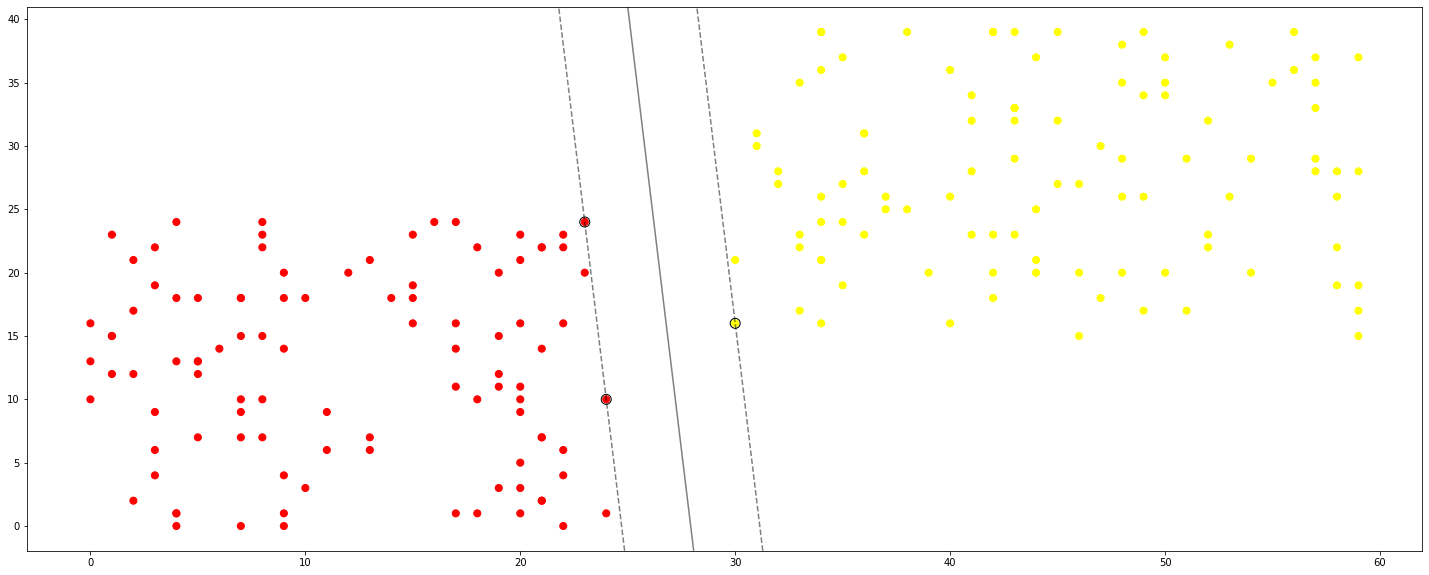

In [37]:
plt.figure(figsize=(25,10))
ax = plt.gca()
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, s=50, cmap='autumn')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()